# Cyber Attack Detector w/ multiclass


In [1]:
! pip install colabcode   #remove in local ipynb

Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

#Load the data sets (from google drive)

In [2]:
from google.colab import drive    #remove in local ipynb
drive.mount('/content/drive/')    #remove in local ipynb

Mounted at /content/drive/


Path

In [3]:
%cd /content/drive/My Drive/datasets/
#remove in local ipynb

/content/drive/My Drive/datasets


#Importing the libraries


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os


# Reading the dataset

In [5]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [6]:
test = pd.read_csv('UNSW_NB15_test-set.csv')
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


### Finding categorical columns
if there are less than 5 discrete value -> assume as a categorical value

In [7]:
train_columns = []
test_columns = []

for col in train.columns:
  num_unique = len(train[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    train_columns.append(col)

for col in test.columns:
  num_unique = len(test[col].unique())
  #print(num_unique)
  if(num_unique < 5):
    test_columns.append(col)

#Matching columns are the categorical columns
#print(train_columns, test_columns)
categorical_columns = list(set(train_columns).intersection(set(test_columns)))
categorical_columns.remove('label')   #y value  (attack_cat <> label)

categorical_columns.append('proto')
categorical_columns.append('service')
categorical_columns.append('state')

categorical_columns

['is_sm_ips_ports', 'is_ftp_login', 'ct_ftp_cmd', 'proto', 'service', 'state']

# Filtering the categorical data



In [8]:
print(train.shape)
print(test.shape)

(175341, 45)
(82332, 45)


### Remove all the records with categorical values that only appear in training or test data

In [9]:
def filter_unique_categories(train, test, column):
    train_values = set(train[column].unique())
    test_values = set(test[column].unique())

    # Get unique values in train and test
    common_values = train_values.intersection(test_values)

    # Filter train and test datasets
    train_filtered = train[train[column].isin(common_values)]
    test_filtered = test[test[column].isin(common_values)]

    return train_filtered, test_filtered

# applying filter to each catogeriacal column
for column in categorical_columns:
    train, test = filter_unique_categories(train, test, column)

print(train.shape)
print(test.shape)

(175309, 45)
(82327, 45)


# Dropping rows with missing values




In [10]:
train.replace('-', np.nan, inplace=True)
test.replace('-', np.nan, inplace=True)
df_train = train.dropna()
df_test = test.dropna()

print(df_train.shape, df_test.shape)

df_train

(81157, 45) (35178, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [11]:
# savepoint - data cleaning/management done
df_train.to_csv('cleaned_train.csv', index=False)
df_test.to_csv('cleaned_test.csv', index=False)

#loading
df_train = pd.read_csv('cleaned_train.csv')
df_test = pd.read_csv('cleaned_test.csv')

# Encoding the data


###Libraries and Functions

In [12]:
from collections.abc import Sequence
from sklearn import preprocessing

#for Classification
def to_xy(df, target):
    # Separate features and target variable
    x = df.drop(columns=[target])  # Drop the target column to get features
    y = pd.get_dummies(df[target])  # one-hot encoding for outputs

    # Convert the resulting arrays to float32
    return x.values.astype(np.float32), y.values.astype(np.float32)

def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

#encode for numeric values
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [13]:
numeric_columns = df_train.columns
numeric_columns = list(numeric_columns)

for x in categorical_columns:
    numeric_columns.remove(x)

numeric_columns.remove('id')    #label
numeric_columns.remove('attack_cat')    #output value
numeric_columns.remove('label')     #output value

### Encoding categorical values

In [14]:
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

#set y values to either 'label' or 'attack_cat' (not using)
df_train.drop('label', axis=1, inplace=True)
df_test.drop('label', axis=1, inplace=True)

#make other textual columns dummies
for df in [df_train, df_test]:
    for x in categorical_columns:
        encode_text_dummy(df, x)

#encode y values for both dataframe that we are using
#attacks_train = encode_text_index(df_train, "attack_cat")
#attacks_test = encode_text_index(df_test, "attack_cat")

Drop the column that train/test data doesn't have in common

In [15]:
common_columns = df_train.columns.intersection(df_test.columns)

df_train = df_train[common_columns]
df_test = df_test[common_columns]

df_train.shape, df_test.shape

((81157, 62), (35178, 62))

### Normalization (numeric values)

In [16]:
for df in [df_train, df_test]:
    for i in numeric_columns:
        encode_numeric_zscore(df, i)

<ipython-input-12-1a16462b65a2>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = (df[name] - mean) / sd


### Split input/output values

In [17]:
#x_train, y_train = to_xy(df_train, "attack_cat")
#x_test, y_test = to_xy(df_test, "attack_cat")

y_train = df_train["attack_cat"]

y_test = df_test["attack_cat"]

In [18]:
y_test.value_counts()

,count
attack_cat,
Generic,18460
Normal,9624
Exploits,5293
DoS,717
Fuzzers,535
Reconnaissance,504
Worms,34
Backdoor,11


In [19]:
y_train.unique()

array(['Normal', 'Backdoor', 'Fuzzers', 'Reconnaissance', 'Exploits',
       'Analysis', 'DoS', 'Worms', 'Generic'], dtype=object)

Drop the output data that doesn't have in common in both table

In [20]:
for x in y_train.unique():
    if x not in y_test.unique():
        y_train = y_train[y_train != x]
        df_train = df_train[df_train['attack_cat'] != x]

In [21]:
df_train.drop("attack_cat", axis=1, inplace=True)
x_train = df_train
x_train = x_train.values.astype(np.float32)

df_test.drop("attack_cat", axis=1, inplace=True)
x_test = df_test
x_test = x_test.values.astype(np.float32)

In [22]:
y_train.unique(), y_test.unique()

(array(['Normal', 'Backdoor', 'Fuzzers', 'Reconnaissance', 'Exploits',
        'DoS', 'Worms', 'Generic'], dtype=object),
 array(['Normal', 'Exploits', 'Reconnaissance', 'Fuzzers', 'DoS', 'Worms',
        'Backdoor', 'Generic'], dtype=object))

In [23]:
# Print shapes of the resulting arrays to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (80593, 61)
y_train shape: (80593,)
x_test shape: (35178, 61)
y_test shape: (35178,)


Drop columns of y_train/y_test that doesn't have in common

## Reshape the input values


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1, 1)
cnn_x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1, 1)

In [25]:
cnn_x_train.shape, cnn_x_test.shape

((80593, 61, 1, 1), (35178, 61, 1, 1))

In [26]:
y_train.shape, y_test.shape

((80593,), (35178,))

## Reshape the output values

In [27]:
#y_train = tf.keras.utils.to_categorical(y_train, len(y_train.unique()))
#y_test = tf.keras.utils.to_categorical(y_test, len(y_test.unique()))


#y_train = encode_text_dummy(y_train, )
y_train = pd.DataFrame(y_train)
attacks_train = encode_text_index(y_train, "attack_cat")
encode_text_dummy(y_train, "attack_cat")

y_test = pd.DataFrame(y_test)
attacks_test = encode_text_index(y_test, "attack_cat")
encode_text_dummy(y_test, "attack_cat")

In [28]:
attacks_train, attacks_test

(array(['Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
        'Reconnaissance', 'Worms'], dtype=object),
 array(['Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
        'Reconnaissance', 'Worms'], dtype=object))

In [29]:
y_train.shape

(80593, 8)

# Define a CNN

In [30]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3,1), strides = (1, 1),
                padding = "valid",  activation = 'tanh',
                input_shape = cnn_x_train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2, 1), strides=None))

model.add(Conv2D(128, (3, 1), activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 1), strides=None))

model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 59, 1, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239,112 (934.03 KB)

 Trainable params: 239,112 (934.03 KB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model


In [32]:
from tensorflow.keras.optimizers import Adam

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Training the model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

start_time = time.time()

batch_size = 128

moniter = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/intrusion_detect.keras", verbose=0, save_best_only=True)

model.fit(cnn_x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          verbose=2,
          validation_data=(cnn_x_test, y_test), callbacks=[moniter,checkpointer])

model.load_weights('dnn/intrusion_detect.keras')

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))


Epoch 1/1000
630/630 - 12s - 18ms/step - accuracy: 0.9122 - loss: 0.2718 - val_accuracy: 0.8822 - val_loss: 0.3177
Epoch 2/1000
630/630 - 12s - 19ms/step - accuracy: 0.9234 - loss: 0.2214 - val_accuracy: 0.9027 - val_loss: 0.2555
Epoch 3/1000
630/630 - 2s - 4ms/step - accuracy: 0.9256 - loss: 0.2111 - val_accuracy: 0.9162 - val_loss: 0.2188
Epoch 4/1000
630/630 - 3s - 4ms/step - accuracy: 0.9270 - loss: 0.2060 - val_accuracy: 0.9188 - val_loss: 0.2142
Epoch 5/1000
630/630 - 2s - 3ms/step - accuracy: 0.9282 - loss: 0.2013 - val_accuracy: 0.9102 - val_loss: 0.2274
Epoch 6/1000
630/630 - 2s - 4ms/step - accuracy: 0.9292 - loss: 0.1973 - val_accuracy: 0.9162 - val_loss: 0.2149
Epoch 7/1000
630/630 - 2s - 3ms/step - accuracy: 0.9303 - loss: 0.1953 - val_accuracy: 0.8990 - val_loss: 0.2473
Epoch 8/1000
630/630 - 3s - 4ms/step - accuracy: 0.9307 - loss: 0.1938 - val_accuracy: 0.9238 - val_loss: 0.1917
Epoch 9/1000
630/630 - 2s - 3ms/step - accuracy: 0.9310 - loss: 0.1916 - val_accuracy: 0.905

In [34]:
score = model.evaluate(cnn_x_train, y_train, verbose=0)
score

[0.17458921670913696, 0.9354038238525391]

In [35]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.17458921670913696
Test accuracy: 0.9354038238525391


In [36]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = model.predict(cnn_x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))


print(metrics.classification_report(y_true, pred))

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9237875945193018
Averaged F1: 0.9150177615029049
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.39      0.03      0.06       717
           2       0.74      0.96      0.84      5293
           3       0.45      0.85      0.59       535
           4       1.00      0.99      0.99     18460
           5       0.98      0.90      0.94      9624
           6       0.45      0.07      0.12       504
           7       0.54      0.21      0.30        34

    accuracy                           0.92     35178
   macro avg       0.57      0.50      0.48     35178
weighted avg       0.92      0.92      0.92     35178



# Plot Functions

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Confusion Matrix

[[    0     0     8     1     1     1     0     0]
 [    0    22   616     7    29    28    15     0]
 [    3    13  5061    29    32   141    13     1]
 [    0     0    37   455     0    35     8     0]
 [    0    20   210     8 18211     4     3     4]
 [    0     1   401   512     0  8706     3     1]
 [    0     0   456     5     7     1    35     0]
 [    0     0    27     0     0     0     0     7]]
Plotting confusion matrix


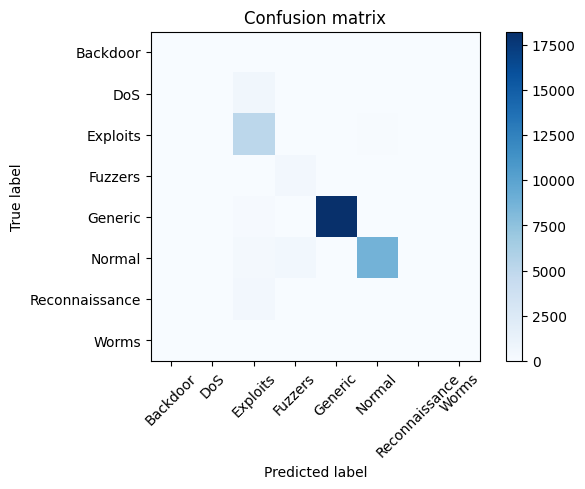

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.39      0.03      0.06       717
           2       0.74      0.96      0.84      5293
           3       0.45      0.85      0.59       535
           4       1.00      0.99      0.99     18460
           5       0.98      0.90      0.94      9624
           6       0.45      0.07      0.12       504
           7       0.54      0.21      0.30        34

    accuracy                           0.92     35178
   macro avg       0.57      0.50      0.48     35178
weighted avg       0.92      0.92      0.92     35178



In [38]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, pred)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, attacks_train)
plt.show()

print(classification_report(y_true, pred))